# Packages


In [1]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import os
from alive_progress import alive_bar

os.chdir("/Users/antoniosquicciarini/ownCloud/PhD Projects/Information_Measurement/Programs")

add_dir = "/Users/antoniosquicciarini/ownCloud/PhD Projects/General_Functions/"
import sys
sys.path.insert(1, add_dir)
from Useful_Funtions_AS import load_object

# General Function

# Import data

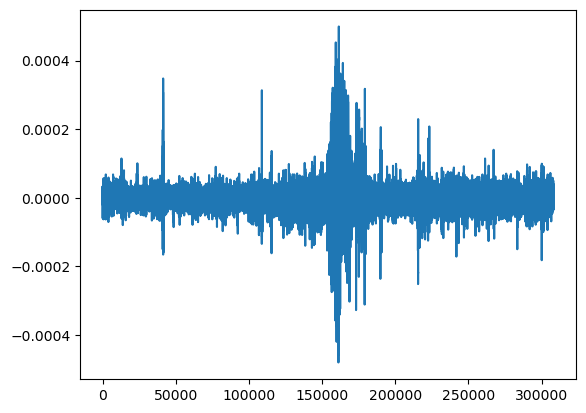

In [13]:
EEG_obj_1 = load_object("/Volumes/T7/EEG_Data/EEG_IM_objs/chb01__2022_12_16_10_14/chb01_03/chb01_03_seizure1.obj")
EEG_obj_2 = load_object("/Volumes/T7/EEG_Data/EEG_IM_objs/chb01__2023_2_6_19_21/chb01_03/chb01_03_seizure1.obj")
raw_data = np.array(EEG_obj_1.raw_data[:, 0])
plt.plot(EEG_obj_1.raw_data[:, 0])


In [14]:
100*np.abs((EEG_obj_2.h_I_opt - EEG_obj_1.h_I_opt)/((EEG_obj_1.h_I_opt+EEG_obj_2.h_I_opt)/2))

array([19.62403108, 50.91106205, 91.85482893,  2.93686897, 24.9907269 ,
       39.75545423, 24.32539601, 30.70714994, 20.13048388, 55.58413159,
       25.26876717,  1.91655867, 55.36084093, 42.24486974, 23.58102766,
        3.9693583 , 21.01654021,  8.33152045, 91.85482893, 75.14793049,
       71.25917288, 49.81063891, 23.58102766])

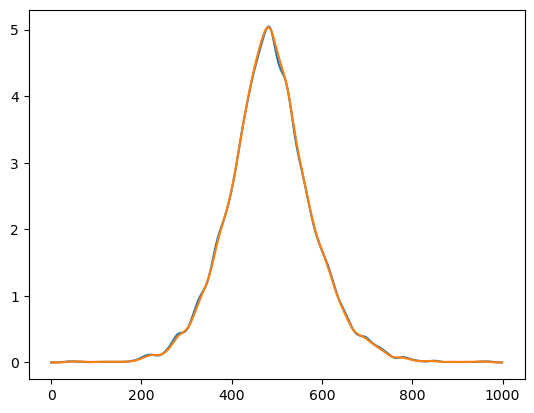

In [15]:
plt.plot(EEG_obj_2.Lambda_Prob_Density[10,14,:])
plt.plot(EEG_obj_1.Lambda_Prob_Density[10,14,:])

# Select Parameters

In [29]:
DeltaXs = np.linspace(2**6,2**15, 100)
hs = np.linspace(0.001, 0.1, 100)   


# Compute Values

In [30]:
S_matr = np.empty([len(DeltaXs), len(hs)])
F_matr = np.empty([len(DeltaXs), len(hs)])
T_matr = np.empty([len(DeltaXs), len(hs)])
EEG_obj = EEG_obj_2

for w_indx, w in enumerate(DeltaXs):
    x = raw_data[:int(w)]
    for h_indx, h in enumerate(hs):
        p = EEG_obj.fixed_KDE(x,h)
        delta = 1/len(p)
        S_matr[w_indx, h_indx] = EEG_obj.ShannonEntropy(p, delta)
        T_matr[w_indx, h_indx] = EEG_obj.TsallisEntropy(p, delta, 3)
        F_matr[w_indx, h_indx] = EEG_obj.FisherInformation(p, delta)
    print("W indx:" + str(w_indx))


/Users/antoniosquicciarini/ownCloud/PhD Projects/Information_Measurement/Programs/class_signal.py:2127: RuntimeWarning: divide by zero encountered in true_divide
  f = subst_nan_numpy_arr((Signal.d1(p,delta)**2)/p[1:len(p)-1], 0)
/Users/antoniosquicciarini/ownCloud/PhD Projects/Information_Measurement/Programs/class_signal.py:2127: RuntimeWarning: invalid value encountered in true_divide
  f = subst_nan_numpy_arr((Signal.d1(p,delta)**2)/p[1:len(p)-1], 0)


W indx:0
W indx:1
W indx:2
W indx:3
W indx:4
W indx:5
W indx:6
W indx:7
W indx:8
W indx:9
W indx:10
W indx:11
W indx:12
W indx:13
W indx:14
W indx:15
W indx:16
W indx:17
W indx:18
W indx:19
W indx:20
W indx:21
W indx:22
W indx:23
W indx:24
W indx:25
W indx:26
W indx:27
W indx:28
W indx:29
W indx:30
W indx:31
W indx:32
W indx:33
W indx:34
W indx:35
W indx:36
W indx:37
W indx:38
W indx:39
W indx:40
W indx:41
W indx:42
W indx:43
W indx:44
W indx:45
W indx:46
W indx:47
W indx:48
W indx:49
W indx:50
W indx:51
W indx:52
W indx:53
W indx:54
W indx:55
W indx:56
W indx:57
W indx:58
W indx:59
W indx:60
W indx:61
W indx:62
W indx:63
W indx:64
W indx:65
W indx:66
W indx:67
W indx:68
W indx:69
W indx:70
W indx:71
W indx:72
W indx:73
W indx:74
W indx:75
W indx:76
W indx:77
W indx:78
W indx:79
W indx:80
W indx:81
W indx:82
W indx:83
W indx:84
W indx:85
W indx:86
W indx:87
W indx:88
W indx:89
W indx:90
W indx:91
W indx:92
W indx:93
W indx:94
W indx:95
W indx:96
W indx:97
W indx:98
W indx:99


# 3d Plot

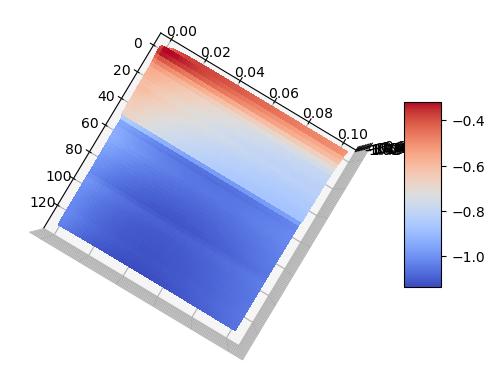

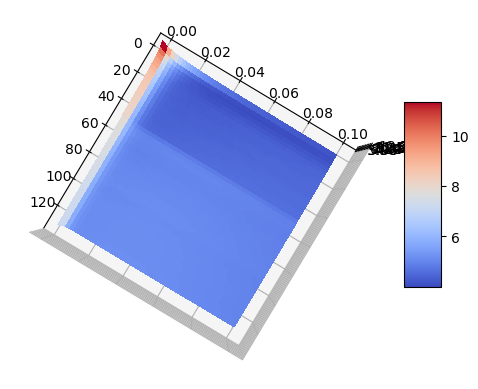

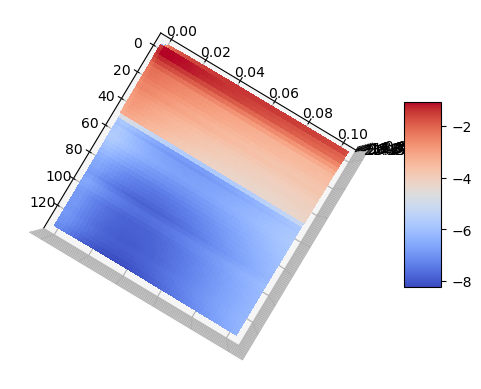

In [38]:
x_view = 90
y_view = 30

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
X, Y = np.meshgrid(DeltaXs/256, hs)
surf = ax.plot_surface(X, Y, np.transpose(S_matr), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(min(S_matr), max(S_matr))
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
#ax.view_init(30, 30)
ax.view_init(x_view, y_view)

plt.show()


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
X, Y = np.meshgrid(DeltaXs/256, hs)
surf = ax.plot_surface(X, Y, np.log(np.transpose(F_matr)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(min(S_matr), max(S_matr))
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
#ax.view_init(30, 30)
ax.view_init(x_view, y_view)

plt.show()


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
X, Y = np.meshgrid(DeltaXs/256, hs)
surf = ax.plot_surface(X, Y, np.transpose(T_matr), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(min(S_matr), max(S_matr))
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(x_view, y_view)

plt.show()

51.90909090909091
0.009000000000000001
-0.9683631647790916


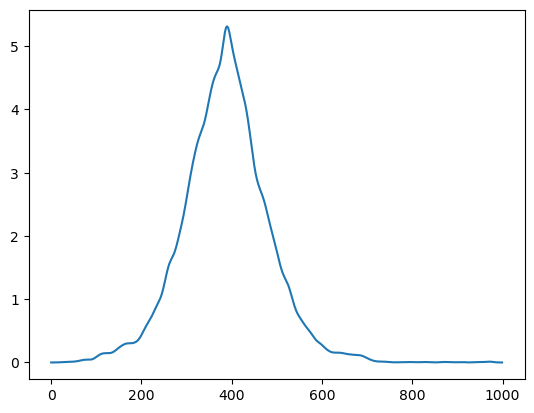

In [145]:
w= DeltaXs[80]
h =hs[8]


print(w/256)
print(h)


x = raw_data[:int(w)]
P = EEG_obj.fixed_KDE(x,h)
plt.plot(P)
print(EEG_obj.ShannonEntropy(P,1/len(P)))

array([ 1.        ,  1.63636364,  2.27272727,  2.90909091,  3.54545455,
        4.18181818,  4.81818182,  5.45454545,  6.09090909,  6.72727273,
        7.36363636,  8.        ,  8.63636364,  9.27272727,  9.90909091,
       10.54545455, 11.18181818, 11.81818182, 12.45454545, 13.09090909,
       13.72727273, 14.36363636, 15.        , 15.63636364, 16.27272727,
       16.90909091, 17.54545455, 18.18181818, 18.81818182, 19.45454545,
       20.09090909, 20.72727273, 21.36363636, 22.        , 22.63636364,
       23.27272727, 23.90909091, 24.54545455, 25.18181818, 25.81818182,
       26.45454545, 27.09090909, 27.72727273, 28.36363636, 29.        ,
       29.63636364, 30.27272727, 30.90909091, 31.54545455, 32.18181818,
       32.81818182, 33.45454545, 34.09090909, 34.72727273, 35.36363636,
       36.        , 36.63636364, 37.27272727, 37.90909091, 38.54545455,
       39.18181818, 39.81818182, 40.45454545, 41.09090909, 41.72727273,
       42.36363636, 43.        , 43.63636364, 44.27272727, 44.90

In [156]:
Y.shape

(50, 100)